Principal Component Analysis (PCA) is a clever technique for reducing the number of variables (features) in your dataset—helping you keep only the most essential information for modeling and pattern finding. It’s especially helpful when data has lots of features or strong correlations between them, and fights the "curse of dimensionality."

**Data Preparation: Standardization**

In [12]:
import numpy as np
import pandas as pd

# Example: Load a dataset (California housing prices, ignoring target)
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

X, _ = fetch_california_housing(return_X_y=True)
X = pd.DataFrame(X)



**Normalize**(standardize)

In [13]:
# Standardize (zero mean, unit variance)
Xmean = np.mean(X, axis=0)
Xc = X - Xmean

# Calculating manually
mu = X.mean()
sigma = X.std()
Xnorm = (X-mu)/sigma

**SVD (Singular Value Decomposition)**

$$X = U \Sigma V^T$$

In [14]:
from scipy.linalg import svd
U, s, Vt = svd(Xnorm, full_matrices=False)
Sigma = np.diag(s)
V = Vt.T  # Vt is transposed in scipy's output

**Analyze Explained Variance**

- The singular values tell you how much variance each principal component captures.

- Sort the components in order of decreasing variance.

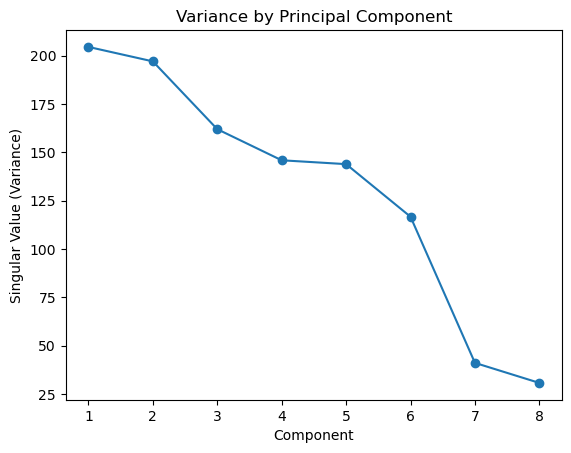

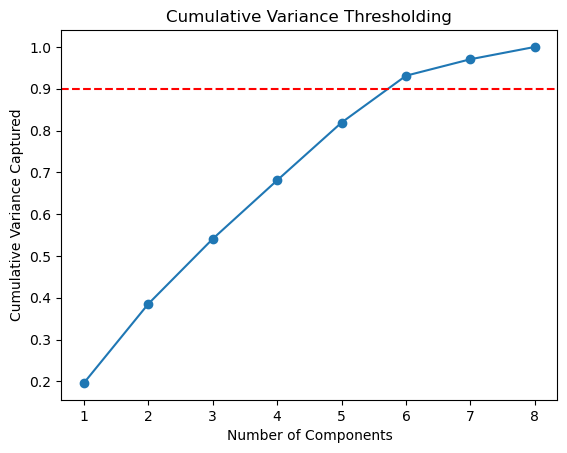

In [15]:
import matplotlib.pyplot as plt

# Singular values (variance per component)
plt.plot(range(1, len(s)+1), s, marker='o')
plt.xlabel("Component")
plt.ylabel("Singular Value (Variance)")
plt.title("Variance by Principal Component")
plt.show()

# Cumulative variance (how many components needed for 90%)
cumvar = np.cumsum(s) / np.sum(s)
plt.plot(range(1, len(s)+1), cumvar, marker='o')
plt.axhline(y=0.9, color='r', linestyle='--')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Variance Captured")
plt.title("Cumulative Variance Thresholding")
plt.show()


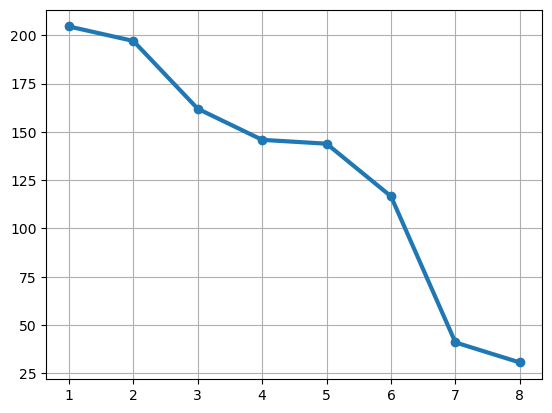

In [16]:
plt.plot(np.arange(len(s))+1,s,linewidth=3,marker='o')
plt.grid()

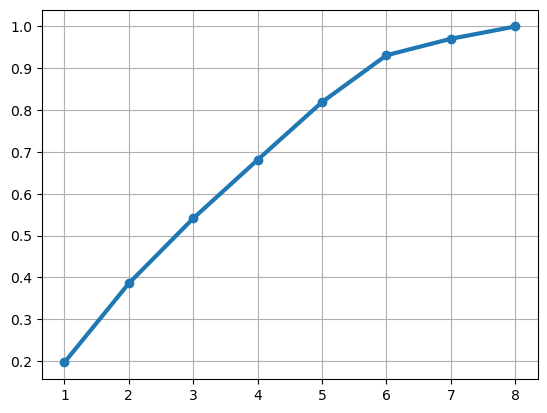

In [17]:
plt.plot(np.arange(len(s))+1,np.cumsum(s)/s.sum(),linewidth=3,marker='o')
plt.grid()

**Project Data to Lower Dimensions**     

To actually reduce dimensionality:
- Take the first $r$ columns of U ($U_r$) and $r \times r$ block of $\Sigma$ ($\Sigma_r$), then:
$$
{X}_{rr} = U_r \Sigma_r
$$
This gives a data matrix where each row is a compressed representation in $r$ principal components.

In the below example, now, each house is described by just 4 numbers instead of 8, capturing most of the original info.

In [18]:
r = 4  # Number of components to keep (e.g., for 90% variance)
U_r = U[:, :r]
Sigma_r = Sigma[:r, :r]
X_rr = pd.DataFrame(U_r @ Sigma_r)
X_rr

,0,1,2,3
0,-1.882659,-0.503350,0.314127,2.555031
1,-1.371086,-0.121403,-1.905212,1.872938
2,-2.086817,-0.501124,0.937222,2.100082
3,-1.575763,-1.239465,1.025933,1.286690
4,-1.591167,-1.345231,1.249141,0.450767
...,...,...,...,...
20635,-1.386746,-1.296106,-0.054261,-1.063000
20636,-1.875174,-0.671517,-0.155696,-0.644596
20637,-1.402323,-1.096399,-0.567121,-1.090370
20638,-1.542906,-1.059383,-0.365464,-0.968775


**Interpreting Principal Components**

- V (eigenvector matrix): Each column shows the weights (both magnitude and direction) from the original features to create each principal component.

- Large absolute coefficient in V means that feature has a big influence on that component.

- Whether a coefficient is “significant” depends on context—often, larger absolute values shine a light on the most influential original variables.

- Check which original features contribute the most by inspecting the below values.

In [19]:
# Look at the first few principal vectors (directions)
for i in range(r):
    print(f"Principal Component {i+1}: {V[:, i]}")

Principal Component 1: [-0.07746229 -0.00731846 -0.43914246 -0.3999956   0.17178267  0.01464423
 -0.56836442  0.53697448]
Principal Component 2: [ 0.22987873 -0.26078574  0.54668689  0.50184958  0.10062559  0.00262099
 -0.37401073  0.4223868 ]
Principal Component 3: [-0.21822239  0.6275508   0.06399944  0.19184813 -0.65037482 -0.15772711
 -0.19259966  0.18082441]
Principal Component 4: [ 0.88529408  0.10989777  0.04640173 -0.33814378 -0.28320692 -0.00491848
 -0.062214   -0.05984646]


**Projecting new Data** (Like Adding a New Home)

If you get a new row of data (not used in PCA originally):
- Normalize using the mean and std from the original data
- Project using the computed V (principal axes)

In [20]:
# Suppose new_home is a new row (same features as X)
new_home = np.array([3, 5, 999, 2, 900, 23, 48, 1])  # For example
newhome_norm = (new_home-mu)/sigma
newhome_projected = newhome_norm @ V[:,:r]
newhome_projected

array([-148.09103047,  244.08922245,   34.75330608,   13.53743727])

In [21]:
# Appending to the existing dataframe
X_rr.loc[len(X_rr)] = newhome_projected
X_rr

,0,1,2,3
0,-1.882659,-0.503350,0.314127,2.555031
1,-1.371086,-0.121403,-1.905212,1.872938
2,-2.086817,-0.501124,0.937222,2.100082
3,-1.575763,-1.239465,1.025933,1.286690
4,-1.591167,-1.345231,1.249141,0.450767
...,...,...,...,...
20636,-1.875174,-0.671517,-0.155696,-0.644596
20637,-1.402323,-1.096399,-0.567121,-1.090370
20638,-1.542906,-1.059383,-0.365464,-0.968775
20639,-1.405482,-0.896706,-0.896790,-0.900215


**PCA Interpretation Tips**

- Singular values σ1, σ2, σ3... are ordered from largest to smallest; the first component always explains the most variance.
- Cumulative variance plots help you choose how many components to keep.
- The principal vectors (V) are mutually orthogonal—a guarantee that each new component brings in fresh (uncorrelated) information.
- By picking the first few components, PCA lets you approximate the original data incredibly well—and helps models learn more effectively.

**PCA & The Curse of Dimensionality**  

Choosing fewer components (by how much total variance you want to keep) helps you beat the "curse of dimensionality," where every extra feature increases data complexity (and the number of samples needed) exponentially. PCA gives you the minimal set capturing the maximum information.

### PCA With Scikit-Learn (Alternative to Manual SVD)

scikit-learn's PCA fits on normalized data, finds principal directions (components), and gives transformed lower-dimensional data.

In [22]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)
X_pca = pca.fit_transform(Xnorm)

print("Explained variance by each PC:", pca.explained_variance_ratio_)
print("PC directions:", pca.components_)


Explained variance by each PC: [0.25336868 0.23516245 0.15888635 0.12887971]
PC directions: [[ 0.07746229  0.00731846  0.43914246  0.3999956  -0.17178267 -0.01464423
   0.56836442 -0.53697448]
 [ 0.22987873 -0.26078574  0.54668689  0.50184958  0.10062559  0.00262099
  -0.37401073  0.4223868 ]
 [ 0.21822239 -0.6275508  -0.06399944 -0.19184813  0.65037482  0.15772711
   0.19259966 -0.18082441]
 [ 0.88529408  0.10989777  0.04640173 -0.33814378 -0.28320692 -0.00491848
  -0.062214   -0.05984646]]


**Recap**

- PCA makes high-dimensional data manageable, keeps the important stuff, and reveals which original features matter most in each new principal component.
- Singular Value Decomposition underpins PCA, making the data transformation possible.
- Always analyze (plot) explained variance to choose a smart number of components!

Step         |  Python Code                       |  Description              
-------------|------------------------------------|---------------------------
Standardize  |  scaler.fit_transform(X)           |  Center & scale           
SVD          |  svd(X_norm, full_matrices=False)  |  Decompose: U, Sigma, Vt  
Variance     |  sand cumulative sum               |  Singular values; variance
Project      |  U_r @ Sigma_r                     |  Compress to r components 
Directions   |  V[:, :r]                          |  Feature weights for PCs  
New Row      |  new_home_norm @ V[:, :r]          |  Project new sample       

Sources:

[1](https://www.askpython.com/python/examples/principal-component-analysis)
[2](https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-pca/)
[3](https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-with-python/)
[4](https://www.youtube.com/watch?v=6uwa9EkUqpg)
[5](https://bagheri365.github.io/blog/Principal-Component-Analysis-from-Scratch/)
[6](https://builtin.com/machine-learning/pca-in-python)
[7](https://www.datacamp.com/tutorial/principal-component-analysis-in-python)
[8](https://codesignal.com/learn/courses/navigating-data-simplification-with-pca/lessons/practical-guide-to-principal-component-analysis-pca-in-data-science)